# Set Environment

## Install Packages

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install torch
!pip3 install -Uqq fastbook
!pip3 install --user graphviz
print("Done")

     |████████████████████████████████| 727kB 9.8MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 194kB 20.6MB/s 
     |████████████████████████████████| 1.2MB 36.4MB/s 
     |████████████████████████████████| 61kB 11.1MB/s 
Done


## Import Packages

In [2]:
import numpy as np
import pandas as pd
import torch
from fastai.tabular.all import *

# Data Preparation

## Load the Data

In [3]:
raw_data = pd.read_csv("data.csv")
raw_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


## Split the Dataset into Training Set & Test Set

In [4]:
# Percentage to split by for training
perc = 90

# Set for training the model
data = raw_data.head(int(len(raw_data)*(perc/100))).copy()

# Set for testing the model later to get the real accuracy
test_set = raw_data.tail(int(len(raw_data)*((100-perc)/100))).copy()

In [5]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10345,X20.V1.910,82,140,179,190,182,141,69,-26,-101,-157,-179,-163,-121,-69,-11,33,61,75,91,101,115,115,109,63,3,-61,-107,-113,-97,-63,-37,5,66,115,137,130,102,59,7,...,-18,24,68,113,147,169,151,105,40,-33,-101,-155,-190,-198,-168,-109,-54,3,51,90,127,167,199,193,141,45,-59,-143,-171,-148,-107,-64,-17,8,26,37,47,71,107,4
10346,X19.V1.80,-34,-1,16,7,-11,-17,-18,-17,-15,-20,-30,-24,-15,-8,9,19,28,40,58,66,63,55,47,44,29,18,3,-5,-1,9,9,12,15,13,7,10,27,31,37,...,36,34,40,46,60,48,33,18,20,27,41,48,46,34,23,15,-2,-13,-20,-20,-25,-38,-39,-46,-35,-18,3,19,26,29,24,32,54,72,77,78,76,57,43,5
10347,X19.V1.514,-43,-51,-55,-54,-50,-41,-32,-30,-27,-31,-24,-19,-16,-12,-9,-12,-20,-20,-21,-24,-27,-29,-33,-28,-34,-39,-45,-50,-54,-61,-66,-63,-63,-62,-65,-68,-69,-64,-54,...,-31,-35,-37,-45,-48,-51,-51,-54,-47,-44,-37,-41,-41,-44,-45,-44,-41,-41,-44,-52,-57,-62,-65,-66,-58,-59,-55,-53,-54,-47,-44,-36,-21,-13,0,10,14,13,7,2
10348,X9.V1.114,13,7,5,5,9,18,31,43,54,59,58,61,62,65,56,48,36,24,18,12,7,7,13,19,17,15,16,13,11,12,23,24,28,34,40,49,55,56,51,...,233,243,254,258,266,266,260,249,247,249,249,245,244,235,227,217,205,190,175,159,143,127,118,105,91,77,65,46,25,5,-16,-36,-57,-75,-94,-105,-110,-111,-110,2


## Format Data for Training

In [6]:
cont_names_data = list(data.columns.values)
cont_names_data.remove("Unnamed: 0")
cont_names_data.remove('y')

In [7]:
cat_names_data = []
for i in data["Unnamed: 0"]:
    cat_names_data.append(i)

In [8]:
data['y'].replace(2, 0, inplace=True)
data['y'].replace(3, 0, inplace=True)
data['y'].replace(4, 0, inplace=True)
data['y'].replace(5, 0, inplace=True)

In [9]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10345,X20.V1.910,82,140,179,190,182,141,69,-26,-101,-157,-179,-163,-121,-69,-11,33,61,75,91,101,115,115,109,63,3,-61,-107,-113,-97,-63,-37,5,66,115,137,130,102,59,7,...,-18,24,68,113,147,169,151,105,40,-33,-101,-155,-190,-198,-168,-109,-54,3,51,90,127,167,199,193,141,45,-59,-143,-171,-148,-107,-64,-17,8,26,37,47,71,107,0
10346,X19.V1.80,-34,-1,16,7,-11,-17,-18,-17,-15,-20,-30,-24,-15,-8,9,19,28,40,58,66,63,55,47,44,29,18,3,-5,-1,9,9,12,15,13,7,10,27,31,37,...,36,34,40,46,60,48,33,18,20,27,41,48,46,34,23,15,-2,-13,-20,-20,-25,-38,-39,-46,-35,-18,3,19,26,29,24,32,54,72,77,78,76,57,43,0
10347,X19.V1.514,-43,-51,-55,-54,-50,-41,-32,-30,-27,-31,-24,-19,-16,-12,-9,-12,-20,-20,-21,-24,-27,-29,-33,-28,-34,-39,-45,-50,-54,-61,-66,-63,-63,-62,-65,-68,-69,-64,-54,...,-31,-35,-37,-45,-48,-51,-51,-54,-47,-44,-37,-41,-41,-44,-45,-44,-41,-41,-44,-52,-57,-62,-65,-66,-58,-59,-55,-53,-54,-47,-44,-36,-21,-13,0,10,14,13,7,0
10348,X9.V1.114,13,7,5,5,9,18,31,43,54,59,58,61,62,65,56,48,36,24,18,12,7,7,13,19,17,15,16,13,11,12,23,24,28,34,40,49,55,56,51,...,233,243,254,258,266,266,260,249,247,249,249,245,244,235,227,217,205,190,175,159,143,127,118,105,91,77,65,46,25,5,-16,-36,-57,-75,-94,-105,-110,-111,-110,0


# Making and Training the Tabular Model

##### Tutorial: https://docs.fast.ai/tabular.learner.html
##### Tutorial: https://colab.research.google.com/github/fastai/fastai/blob/master/nbs/44_tutorial.tabular.ipynb

## Make the DataLoaders

In [10]:
splits = RandomSplitter(valid_pct=0.3, seed=None)(range_of(data))

to = TabularPandas(
    data,
    cont_names = cont_names_data,
    procs = [Normalize, FillMissing, Categorify],
    splits = splits,
    y_block = CategoryBlock,
    y_names= "y"
)

dls = to.dataloaders(bs=256)
dls.show_batch()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,9.000001,2.000000,3.000000,9.000000,36.999999,48.000001,51.000001,52.000002,4.800000e+01,40.000000,35.000001,33.000000,27.000001,29.999999,34.999999,39.000001,46.000001,45.000000,42.999998,4.100000e+01,44.999998,50.999998,51.999999,47.000000,34.999999,36.000000,26.000001,19.000001,11.000000,-7.000000,-20.000000,-13.000000,-14.000000,-17.000000,-26.000000,-32.000001,-25.999999,-25.999999,-22.000000,-19.000000,-18.000000,-13.000000,-3.000000,-1.000000,-6.000000,1.000000,2.000000,2.581016e-07,8.000000,13.999999,29.000001,42.000002,80.999997,112.000002,140.999997,149.000003,161.999996,152.000005,140.999999,127.999997,116.999996,110.999996,109.999997,104.000003,100.000002,94.999996,93.000001,84.000005,56.999999,34.000000,12.000000,2.000000,-2.000000,7.000000,1.000000,-2.111376e-07,-15.000000,-11.000000,-16.000000,-1.000000e+01,-3.000000,-4.000000,-15.000000,-19.000000,-24.000000,-19.000000,-25.999999,-22.000000,-23.000000,-1.700000e+01,-6.000000,7.000000,1.100000e+01,13.000000,18.999999,14.999999,13.000001,10.000000,-2.000000,-10.000000,-29.999999,-50.999999,-74.999998,-98.000003,-105.000000,-105.999998,-114.000003,-116.000000,-116.000001,-124.999998,-133.999995,-128.000004,-121.000004,-114.000001,-100.000000,-82.999999,-74.999998,-63.000001,-65.000000,-66.999999,-59.000002,-58.999999,-50.999998,-45.000001,-43.000001,-31.999999,-37.999999,-41.000001,-41.000001,-26.000001,-2.400000e+01,-7.000000,-6.000000,4.000000,2.453935e-07,7.000000,7.000000,7.000000,3.000000,3.000000,5.000000,7.000000,1.076317e-07,5.000001,2.000000,10.999999,19.999999,21.000000,18.000000,12.000001,12.000001,5.000000,10.000000,10.000000,12.000000,7.000000,1.800000e+01,23.000001,23.999999,22.000000,20.000001,24.999999,26.000000,28.000001,27.999999,27.000000,33.000002,38.999998,43.999999,38.999998,48.000001,48.000002,48.000002,48.999998,61.999998,78.000001,84.999999,93.999998,0
1,23.999999,30.999998,44.000000,66.000002,96.999999,129.000005,152.999999,143.000004,1.020000e+02,60.000001,33.999999,29.999999,39.000000,38.999999,26.000001,5.000000,-3.000000,-10.000000,-14.000000,-6.864971e-08,33.999999,65.000002,80.000003,84.000003,78.000001,70.999999,61.000002,63.999998,59.000002,66.000002,74.000001,74.000001,71.999999,56.999999,48.000002,32.999999,30.000000,28.000000,34.999998,40.000002,46.999999,42.000001,8.000000,-16.000000,-22.000000,-9.000000,3.000000,6.000000e+00,13.000000,-7.000000,-8.000000,2.000000,19.999999,28.999999,22.000000,10.999999,5.000000,18.999999,35.000002,39.999999,22.000001,7.000000,-5.000000,-7.000000,-2.000000,13.000000,17.999999,11.000001,5.000000,3.000000,12.000000,25.000001,30.000001,8.000001,-29.000001,-4.200000e+01,-36.000000,-15.000000,10.000000,2.400000e+01,23.000001,18.000001,24.000001,34.000000,39.999998,43.999998,51.999999,45.000000,22.999999,-5.000000e+00,-31.000000,-44.000000,-3.400000e+01,-16.000001,-1.000000,9.000000,15.000001,11.000000,15.999999,26.999999,47.999997,52.000002,44.999999,33.000001,17.000000,9.000000,14.999999,39.999998,45.999999,39.000001,12.000000,-16.000000,-20.000000,-3.000000,29.999999,43.999998,37.000000,16.000001,9.000000,33.999998,74.000003,98.000003,88.000002,55.999998,31.000000,18.000000,10.999999,20.000000,15.000001,-3.000000,-3.400000e+

## Training

### Find the best learning rate

0.003981071710586548
0.7585775852203369


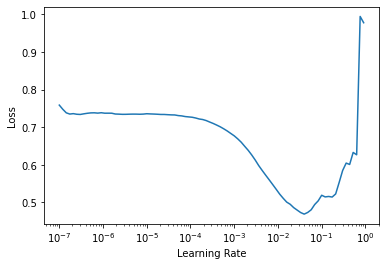

In [11]:
f1score = F1Score()

# learn = tabular_learner(dls, metrics=[accuracy, error_rate, f1score])
learn = tabular_learner(dls, metrics=[f1score, accuracy, error_rate])
lr_min, lr_steep = learn.lr_find()
print(lr_min)
print(lr_steep)

### Train the Model

In [12]:
learn.fit(n_epoch=100, lr=lr_min)

epoch,train_loss,valid_loss,f1_score,accuracy,error_rate,time
0,0.153359,0.097223,0.920368,0.966506,0.033494,00:00
1,0.107568,0.088199,0.915012,0.965539,0.034461,00:00
2,0.083144,0.080841,0.924316,0.969726,0.030274,00:00
3,0.068871,0.078137,0.932039,0.972947,0.027053,00:00
4,0.058461,0.079855,0.929669,0.971981,0.028019,00:00
5,0.055010,0.074025,0.930271,0.972625,0.027375,00:00
6,0.046738,0.076933,0.937500,0.975523,0.024477,00:00
7,0.042001,0.082103,0.941176,0.976812,0.023188,00:00
8,0.037298,0.088806,0.932455,0.973591,0.026409,00:00
9,0.033798,0.093553,0.930464,0.972947,0.027053,00:00


In [13]:
learn.show_results()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y,y_pred
0,-0.545033,-0.109149,0.263979,0.507910,0.632220,0.683270,0.744631,0.723541,0.531985,0.192365,-0.187685,-0.557665,-0.850172,-0.933627,-0.886195,-0.712852,-0.428080,-0.070985,0.262481,0.523080,0.740987,0.801562,0.804999,0.761695,0.697911,0.494838,0.017360,-0.555301,-1.149318,-1.522483,-1.593469,-1.452458,-1.298965,-1.137201,-0.804291,-0.368947,0.085961,0.399656,0.552544,0.533638,0.411169,0.243124,-0.056544,-0.422125,-0.774380,-0.939088,-0.917786,-0.689509,-0.369542,-0.073663,0.158251,0.357455,0.600597,0.759045,0.864776,0.856125,0.728956,0.483524,0.191192,-0.151239,-0.576164,-0.976725,-1.263291,-1.303706,-1.084890,-0.695711,-0.334531,-0.030072,0.315741,0.661195,0.834368,0.658074,0.203339,-0.371511,-0.876313,-1.182404,-1.230022,-1.167947,-1.077654,-0.846711,-0.531527,-0.116858,0.392002,0.925580,1.353527,1.501719,1.350451,0.880691,0.213595,-0.477846,-0.945097,-1.214368,-1.328327,-1.179011,-0.961800,-0.703008,-0.431482,-0.051369,0.273618,0.500518,0.533265,0.384917,0.215236,0.021807,-0.197871,-0.538690,-0.833745,-0.845138,-0.602426,-0.182976,0.259465,0.753687,1.067135,1.200919,1.178729,1.001007,0.724165,0.286221,-0.223994,-0.844942,-1.282417,-1.396181,-1.257518,-1.065334,-0.886062,-0.725118,-0.501436,-0.142487,0.230751,0.473732,0.430156,0.256069,-0.028042,-0.361460,-0.727089,-1.054375,-1.226192,-1.242564,-1.083053,-0.866377,-0.645115,-0.390313,-0.006317,0.406631,0.717397,0.836856,0.638316,0.282402,-0.159589,-0.611278,-0.984208,-1.200184,-1.180002,-1.026044,-0.843898,-0.577606,-0.301389,-0.018533,0.242179,0.528104,0.722673,0.811698,0.627857,0.165247,-0.530920,-1.249543,-1.677983,-1.764750,-1.568161,-1.179384,-0.717339,-0.355105,-0.088048,0.118012,0.247764,0.394647,0.485134,0.501494,0.0,0.0
1,-0.070807,-0.013449,0.012666,-0.005771,-0.113583,-0.206846,-0.284973,-0.277234,-0.141256,-0.000632,0.166702,0.265758,0.325538,0.284655,0.291780,0.342490,0.367555,0.269660,0.130603,0.080444,-0.017304,-0.029017,-0.042734,-0.094353,-0.157152,-0.212691,-0.226517,-0.253476,-0.225070,-0.160888,-0.089800,-0.052662,-0.002017,0.025808,0.006842,0.037097,0.122967,0.217601,0.279158,0.331369,0.317171,0.172881,-0.011415,-0.120931,-0.130156,-0.104490,-0.040597,-0.029358,-0.074748,-0.043346,0.028176,0.148274,0.178585,0.206247,0.127543,-0.024289,-0.157155,-0.252203,-0.278736,-0.285486,-0.194477,-0.132023,-0.087203,-0.081872,-0.024313,0.024797,0.065848,0.123012,0.159171,0.223018,0.312989,0.386364,0.314210,0.166365,-0.038167,-0.235992,-0.409197,-0.474914,-0.383410,-0.252982,-0.095442,0.019669,0.063132,0.080376,0.140361,0.209340,0.206458,0.226437,0.256398,0.244925,0.130548,-0.045437,-0.272538,-0.516869,-0.629674,-0.603849,-0.413308,-0.158748,0.083313,0.264141,0.233524,0.182442,0.160993,0.247916,0.351166,0.487687,0.528087,0.369837,0.067978,-0.194709,-0.437516,-0.597553,-0.583696,-0.423214,-0.202004,0.097316,0.430426,0.666568,0.753077,0.788481,0.695738,0.591936,0.500436,0.451394,0.319643,0.054245,-0.234515,-0.544763,-0.752357,-0.828440,-0.742606,-0.587862,-0.372135,-0.083300,0.195947,0.405350,0.485322,0.449866,0.287150,0.156691,0.126455,0.103885,0.035729,-0.074679,-0.182003,-0.337667,-0.499397,-0.639307,-0.672863,-0.593318,-0.371817,-0.084259,0.092774,0.216636,0.225906,0.175127,0.095738,0.07

### Save the Model

In [14]:
name = "EEG_torch"
# save_format = int(input("Which format to save the model:\n\t1. .pt - PyTorch\n\t2. pkl - FastAi\n1 or 2:"))
save_format = 1
# Try both of them and let me know which one works
if save_format == 1:
    torch.save(learn, name + ".pt")
    print("Saved the model using torch")
elif save_format == 2:
    learn.export(name + ".pkl")
    print("Saved the model using FastAi")
else:
    print("Did not work")

Saved the model using torch


##### To load the model use format model = torch.load(model_name)

# Test the Model with Test Set

In [15]:
if save_format == 1:
    model = torch.load(name + ".pt")
    print("Loaded the .pt model using torch")
elif save_format == 2:
    model = torch.load(name + ".pkl")
    print("Loaded the .pkl model using torch")
else:
    print("Did not work")

Loaded the .pt model using torch


In [16]:
# Just made this function so it is easier to test. It takes of the unnamed column and the y
def get_row(row_number):
    # print(test_set.iloc[row_number].iloc[1:])
    row = test_set.iloc[row_number].iloc[1:-1]
    return row

In [17]:
row_num = 232
row, clas, probs = model.predict(get_row(row_num))

In [18]:
row.show()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,17.000001,-2.0,-32.0,-41.000001,-32.0,-3.0,53.999998,112.999996,184.000006,245.999999,264.999995,231.999996,147.000005,61.999998,-12.0,-53.000001,-72.0,-67.999998,-49.000001,-26.0,8.0,50.999998,101.000001,138.0,169.000007,185.999997,182.000002,157.000001,132.999996,113.000002,118.000004,132.999998,180.999999,224.000006,344.000013,261.999997,176.999998,29.999999,-171.999996,-341.999992,-726.000028,-1033.000026,-1296.000052,-1377.000053,-1306.999999,-1115.000024,-804.000011,-490.000004,-206.999998,-25.0,49.000002,51.000002,-11.0,-86.000001,-160.000004,-215.000005,-246.999998,-280.0,-310.000003,-355.000014,-387.000002,-404.000007,-394.999998,-373.000008,-366.000015,-358.000002,-341.000012,-311.0,-261.999993,-207.999998,-158.000002,-100.999999,-29.0,81.000001,184.000004,207.999993,147.0,22.0,-58.0,-43.000001,-3.0,41.000002,103.000005,139.000004,164.999994,173.999995,59.999999,-83.000001,-428.00001,-766.999974,-979.999988,-970.000008,-753.00001,-479.999995,-223.000008,64.999998,363.999986,649.000003,854.0,955.000026,905.000013,713.999996,438.999986,163.000009,-63.0,-200.999997,-263.999996,-237.000003,-184.000005,-77.000001,-10.0,176.999997,384.999989,579.000009,690.000009,658.000012,586.000012,527.999996,452.000005,289.999999,71.000002,-92.0,-93.000005,74.000001,37.000002,-285.000005,-741.999997,-1114.000022,-1122.000027,-844.999969,-477.000009,-149.999999,56.0,135.0,160.000001,100.999996,-79.000002,-307.000006,-456.999985,-441.000001,-309.999992,-161.999996,-61.000002,-1.0,52.000002,110.999999,179.999993,247.000002,339.000014,386.000004,430.999999,423.000001,402.000019,392.000009,465.000018,624.99999,770.999998,963.000028,1155.000006,1331.000016,1542.999938,1556.000006,1379.999943,813.00001,-224.0,-1133.000023,-1786.000045,-1761.000053,-1420.999987,-1049.999975,-746.000031,-509.999985,-233.999999,34.000002,244.000003,367.0,384.000012,336.999989,1


In [19]:

print(clas.int())

#result = torch.round(torch.abs(clas))

if clas.int() == 1:
    print("Seizure Detected")
else:
    print("No Seizure Detected")

tensor(1, dtype=torch.int32)
Seizure Detected


In [20]:
test_set

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
10350,X22.V1.634,-99,-98,-62,-8,51,106,143,164,171,162,132,97,54,18,-12,-37,-41,-27,-7,15,35,47,53,56,51,42,27,10,-8,-18,-12,5,36,68,99,116,123,117,97,...,85,62,34,-4,-43,-77,-92,-75,-34,30,95,146,177,198,210,204,186,150,97,54,20,12,30,67,111,145,173,195,214,213,177,85,-70,-195,-209,-88,89,153,109,1
10351,X7.V1.413,18,-4,-10,4,14,15,0,-13,-33,-59,-68,-74,-75,-70,-64,-54,-35,-20,-22,-28,-35,-24,-21,-14,14,55,93,121,127,110,99,92,105,111,104,81,37,13,-6,...,82,85,81,80,87,87,108,112,99,93,80,55,30,18,27,27,28,18,21,8,12,14,19,31,40,39,27,23,10,6,-3,-8,-15,-15,0,16,31,30,21,3
10352,X16.V1.602,-57,-48,-44,-44,-37,-26,-23,-19,-13,-21,-22,-17,-10,-9,-12,-6,-9,-14,-23,-32,-41,-44,-44,-35,-35,-32,-33,-35,-40,-39,-38,-32,-26,-21,-12,-1,0,-8,-13,...,3,-3,-9,-16,-13,-12,-9,-23,-34,-41,-38,-34,-32,-28,-24,-22,-28,-29,-24,-20,-18,-17,-8,-7,-3,7,2,3,0,-3,-1,1,10,24,36,39,41,40,36,3
10353,X19.V1.4,-1,-16,-15,-13,-13,-17,-19,-18,-6,14,33,44,34,16,-9,-17,-29,-38,-51,-52,-52,-36,-34,-18,-23,-49,-53,-63,-58,-64,-62,-85,-90,-71,-60,-41,-45,-50,-46,...,70,59,58,34,24,17,10,-6,-21,4,44,80,105,119,114,114,100,73,37,5,-14,-21,-1,20,43,69,100,122,126,107,52,1,-23,-22,-5,-16,-27,-18,-1,5
10354,X14.V1.531,-50,-58,-57,-52,-41,-40,-35,-23,-20,-17,-23,-22,-34,-45,-50,-48,-39,-24,-3,-3,-4,-11,-18,-21,-11,3,9,11,11,-1,-22,-34,-45,-49,-45,-35,-24,-18,3,...,-37,-43,-38,-20,8,29,44,47,36,10,-19,-44,-72,-82,-82,-69,-62,-50,-40,-23,2,36,63,66,64,48,26,-1,-21,-38,-51,-44,-43,-38,-35,-13,19,52,97,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3


In [21]:
test_set['y'].replace(1, 1, inplace=True)
test_set['y'].replace(2, 0, inplace=True)
test_set['y'].replace(3, 0, inplace=True)
test_set['y'].replace(4, 0, inplace=True)
test_set['y'].replace(5, 0, inplace=True)

In [22]:
test_set

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
10350,X22.V1.634,-99,-98,-62,-8,51,106,143,164,171,162,132,97,54,18,-12,-37,-41,-27,-7,15,35,47,53,56,51,42,27,10,-8,-18,-12,5,36,68,99,116,123,117,97,...,85,62,34,-4,-43,-77,-92,-75,-34,30,95,146,177,198,210,204,186,150,97,54,20,12,30,67,111,145,173,195,214,213,177,85,-70,-195,-209,-88,89,153,109,1
10351,X7.V1.413,18,-4,-10,4,14,15,0,-13,-33,-59,-68,-74,-75,-70,-64,-54,-35,-20,-22,-28,-35,-24,-21,-14,14,55,93,121,127,110,99,92,105,111,104,81,37,13,-6,...,82,85,81,80,87,87,108,112,99,93,80,55,30,18,27,27,28,18,21,8,12,14,19,31,40,39,27,23,10,6,-3,-8,-15,-15,0,16,31,30,21,0
10352,X16.V1.602,-57,-48,-44,-44,-37,-26,-23,-19,-13,-21,-22,-17,-10,-9,-12,-6,-9,-14,-23,-32,-41,-44,-44,-35,-35,-32,-33,-35,-40,-39,-38,-32,-26,-21,-12,-1,0,-8,-13,...,3,-3,-9,-16,-13,-12,-9,-23,-34,-41,-38,-34,-32,-28,-24,-22,-28,-29,-24,-20,-18,-17,-8,-7,-3,7,2,3,0,-3,-1,1,10,24,36,39,41,40,36,0
10353,X19.V1.4,-1,-16,-15,-13,-13,-17,-19,-18,-6,14,33,44,34,16,-9,-17,-29,-38,-51,-52,-52,-36,-34,-18,-23,-49,-53,-63,-58,-64,-62,-85,-90,-71,-60,-41,-45,-50,-46,...,70,59,58,34,24,17,10,-6,-21,4,44,80,105,119,114,114,100,73,37,5,-14,-21,-1,20,43,69,100,122,126,107,52,1,-23,-22,-5,-16,-27,-18,-1,0
10354,X14.V1.531,-50,-58,-57,-52,-41,-40,-35,-23,-20,-17,-23,-22,-34,-45,-50,-48,-39,-24,-3,-3,-4,-11,-18,-21,-11,3,9,11,11,-1,-22,-34,-45,-49,-45,-35,-24,-18,3,...,-37,-43,-38,-20,8,29,44,47,36,10,-19,-44,-72,-82,-82,-69,-62,-50,-40,-23,2,36,63,66,64,48,26,-1,-21,-38,-51,-44,-43,-38,-35,-13,19,52,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,0


In [23]:
correct = 0
wrong = 0

for i in range(10350, 11500):
    row, clas, probs = model.predict(get_row(i-10350))
    if clas.int() == test_set['y'][i]:
        correct += 1
    else:
        print(i)
        print(str(clas.int()) + ", " + str(test_set['y'][i]))
        wrong += 1
print("Correct: ", correct)
print("Wrong: ", wrong)
print("Percent: " + str(correct / (correct + wrong)))

10369
tensor(0, dtype=torch.int32), 1


10399
tensor(0, dtype=torch.int32), 1


10416
tensor(1, dtype=torch.int32), 0


10428
tensor(1, dtype=torch.int32), 0


10568
tensor(0, dtype=torch.int32), 1


10633
tensor(0, dtype=torch.int32), 1


10639
tensor(0, dtype=torch.int32), 1


10706
tensor(0, dtype=torch.int32), 1


10738
tensor(0, dtype=torch.int32), 1


10830
tensor(0, dtype=torch.int32), 1


10898
tensor(0, dtype=torch.int32), 1


10916
tensor(0, dtype=torch.int32), 1


10961
tensor(0, dtype=torch.int32), 1


10984
tensor(0, dtype=torch.int32), 1


11061
tensor(0, dtype=torch.int32), 1


11072
tensor(0, dtype=torch.int32), 1


11083
tensor(0, dtype=torch.int32), 1


11102
tensor(0, dtype=torch.int32), 1


11105
tensor(0, dtype=torch.int32), 1


11117
tensor(0, dtype=torch.int32), 1


11160
tensor(0, dtype=torch.int32), 1


11178
tensor(0, dtype=torch.int32), 1


11204
tensor(0, dtype=torch.int32), 1


11274
tensor(0, dtype=torch.int32), 1


11298
tensor(1, dtype=torch.int32), 0


11299
tensor(0, dtype=torch.int32), 1


11351
tensor(0, dtype=torch.int32), 1


11423
tensor(1, dtype=torch.int32), 0


Correct:  1122
Wrong:  28
Percent: 0.9756521739130435
